# Graded Lab Assignment 2: Evaluate classifiers (10 points)
 
In this assignment you will optimize and compare the perfomance of a parametric (logistic regression) and non-parametric (k-nearest neighbours) classifier on the MNIST dataset.

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline.  

### Deadline Friday, November 17, 23:59.

This notebook consists of three parts: design, implementation, results & analysis. 
We provide you with the design of the experiment and you have to implement it and analyse the results.

### Criteria used for grading
* Explain and analyse all results.
* Make your notebook easy to read. When you are finished take your time to review it!
* You do not want to repeat the same chunks of code multiply times. If your need to do so, write a function. 
* The implementation part of this assignment needs careful design before you start coding. You could start by writing pseudocode.
* In this exercise the insights are important. Do not hide them somewhere in the comments in the implementation, but put them in the Analysis part
* Take care that all the figures and tables are well labeled and numbered so that you can easily refer to them.
* A plot should have a title and axes labels.
* You may find that not everything is 100% specified in this assignment. That is correct! Like in real life you probably have to make some choices. Motivate your choices.


### Grading points distribution

* Implementation 5 points
* Results and analysis 5 points

## Design of the experiment

You do not have to keep the order of this design and are allowed to alter it if you are confident.
* Import all necessary modules. Try to use as much of the available functions as possible. 
* Use the provided train and test set of MNIST dataset.
* Pre-process data eg. normalize/standardize, reformat, etc.           
  Do whatever you think is necessary and motivate your choices.
* (1) Train logistic regression and k-nn using default settings.
* Use 10-fold cross validation for each classifier to optimize the performance for one parameter: 
    * consult the documentation on how cross validation works in sklearn (important functions:             cross_val_score(), GridSearchCV()).
    * Optimize k for k-nn,
    * for logistic regression focus on the regularization parameter,
* (2) Train logistic regression and k-nn using optimized parameters.
* Show performance on the cross-validation set for (1) and (2) for both classifiers: 
    * report the average cross validation error rates (alternatively, the average accuracies - it's up to you) and standard deviation,
    * plot the average cross valildation errors (or accuracies) for different values of the parameter that you tuned. 

* Compare performance on the test set for two classifiers:
    * produce the classification report for both classifiers, consisting of precision, recall, f1-score. Explain and analyse the results.
    * print confusion matrix for both classifiers and compare whether they missclassify the same  classes. Explain and analyse the results.
* Discuss your results.
* BONUS: only continue with this part if you are confident that your implemention is complete 
    * tune more parameters of logistic regression
    * add additional classifiers (NN, Naive Bayes, decision tree), 
    * analyse additional dataset (ex. Iris dataset)

## Implementation of the experiment

## 1. Training with default settings
##### Initiation

In [135]:
%pylab inline

from sklearn.datasets import load_digits
from sklearn.datasets import load_iris               # Data used in BONUS exercise
from sklearn.preprocessing import StandardScaler     # to normalize data
from sklearn.model_selection import train_test_split # to split in train and test set
from sklearn.model_selection import cross_val_score  # for 10-fold cross validation
from sklearn.linear_model import LogisticRegression  # logistic regression classifier
from sklearn.neighbors import KNeighborsClassifier   # knn classifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, f1_score, precision_recall_curve

# mnist dataset.
digits = load_digits()
X = reshape(digits.images,(1797,64))                   #needed for cross validation                    
X_train_mnist = reshape(digits.images[:1500],(1500,64))  
X_test_mnist = reshape(digits.images[1500:],(297,64))
y = digits.target                                      #needed for cross validation
y_train_mnist = digits.target[:1500]
y_test_mnist = digits.target[1500:]            

# Pre-processing of mnist data
scaler = StandardScaler()                                
scaler.fit(X_train_mnist)
scaler.fit(X_test_mnist)
X_train_scaled_mnist = scaler.transform(X_train_mnist) #scaled training set
X_test_scaled_mnist = scaler.transform(X_test_mnist)   #scaled test set

Populating the interactive namespace from numpy and matplotlib


##### 10-Fold Cross Validation

In [147]:
# Function for 10-fold cross validation for all models.
def cv_10f(model):
    model = model.fit(X_train_scaled_mnist, y_train_mnist) #fit model to scaled training data
    score = cross_val_score(model, X, y, cv=10)            #calculate accuracy for each cross validation 
    average_score = average(score)                         #average of the 10 cross validation accuracies
    st_dev = score.std(axis=0)                             #standard deviation of 10-fold cross validation
    cv10 = [score, average_score, st_dev]                  #stores values, so you do as few calculations as possible
    return cv10

lr = LogisticRegression()
print("Average accuracy value of LR is:", cv_10f(lr)[1])
knn = KNeighborsClassifier()
print("Average accuracy value of KNN is:",cv_10f(knn)[1])

Average accuracy value of LR is: 0.931029834684
Average accuracy value of KNN is: 0.973948287255


##### Optimization of k

The highest accuracy rate: 0.97778921138 is achieved with k = 3


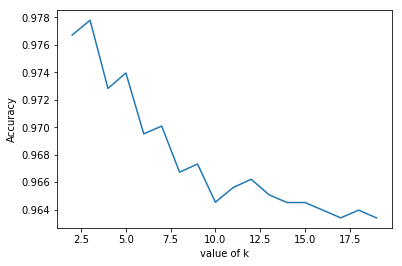

In [156]:
k_list = []     #initialize the values of k
start = 2
end = 20
K = range(start,end) #range of k's we want to test for optimalization    

# Do 10-fold cv for all k's in the range
for k in K:
    knn = KNeighborsClassifier(n_neighbors = k)  #initiate function with new parameter k
    k_list.append(cv_10f(knn)[1])                #save average 10-fold cv value for that k
    
#plot the accuracy values for differen k values
plt.ylabel("Accuracy")
plt.xlabel("value of k")
plt.plot(K,k_list)

optk = start+(k_list.index(max(k_list))) #calculate optimal k

#Report the highest accuracy and it's corresponding optimal value of k
print("The highest accuracy rate:",max(k_list),"is achieved with k =",optk)

##### Optimization of lambda 

The highest accuracy rate: 0.941602537134 is achieved with C = 0.048666666666666664 , so lambda =  20.547945205479454


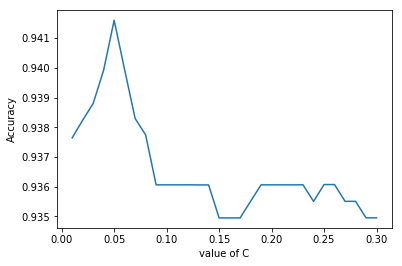

In [152]:
# NOTE ! : C is the inverse of lambda (so this needs to be adapted)

l_list = []                        #initialize the values of C
start = 0.01
end = 0.3
steps = 30
L = np.linspace(start, end, num=steps) #range of C's we want to test for optimalization 

# Do 10-fold cv for all C's in the range
for l in L:
    lr = LogisticRegression(C = l) #initiate function with new parameter C
    l_list.append(cv_10f(lr)[1])   #save average 10-fold cv value for that C
    
#plot the accuracy values for differen C values
plt.ylabel("Accuracy")
plt.xlabel("value of C")
plt.plot(L,l_list)

stepsize = (end-start)/steps                     #calculates the stepsize in the range
optC = 0.01+(l_list.index(max(l_list)))*stepsize #calculate optimal C

#Report the highest accuracy and it's corresponding optimal value of C
print("The highest accuracy rate:",max(l_list),"is achieved with C =",optC, ', so lambda = ',1/optC)

## 2. Training with optimalized parameters
### 10-Fold Cross Validation

In [158]:
#Logistic Regression with optimal C
optimized_lr = LogisticRegression(C = optC)   #optimized function for linear regression
lrcv10 = cv_10f(optimized_lr)                 #optimized 10-fold cross validation
print("Linear Regression \n","average cv:",lrcv10[1],"\n standard deviation:",lrcv10[2])

#Nearest Neighbors Classification with optimal k
optimized_knn = KNeighborsClassifier(n_neighbors = optk) #optimized function for k nearest neighbors
knncv10 = cv_10f(optimized_knn)                          #optimized 10-fold cross validation
print("K Nearest Neighbors Classification \n","average cv:",knncv10[1],"\n standard deviation:",knncv10[2])

Linear Regression 
 average cv: 0.941602537134 
 standard deviation: 0.0295896304236
K Nearest Neighbors Classification 
 average cv: 0.97778921138 
 standard deviation: 0.0159395747319


##### Analysis

### Classification report

In [159]:
target_names = [str(digit) for digit in range(0,10)]  #class labels (digits)

#Logistic Regression

#predicts labels with the optimized function
lry_predict = optimized_lr.fit(X_test_scaled_mnist, y_test_mnist).predict(X_test_scaled_mnist)

print("Linear Regression Classification Report:\n",classification_report(y_test_mnist, lry_predict, target_names=target_names))

#Nearest Neighbors Classification with k = 3

#predicts labels with the optimized function
knny_predict = optimized_knn.fit(X_test_scaled_mnist, y_test_mnist).predict(X_test_scaled_mnist)

print("K Nearest Neighbors Classification Report:\n", classification_report(y_test_mnist, knny_predict, target_names=target_names))


Linear Regression Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.97      0.94      0.95        31
          2       1.00      1.00      1.00        27
          3       0.97      1.00      0.98        30
          4       1.00      0.97      0.98        33
          5       0.91      1.00      0.95        30
          6       1.00      1.00      1.00        30
          7       1.00      1.00      1.00        30
          8       0.89      0.89      0.89        28
          9       0.93      0.87      0.90        31

avg / total       0.97      0.97      0.97       297

K Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.86      1.00      0.93        31
          2       1.00      1.00      1.00        27
          3       0.97      1.00      0.98        30
         

##### Analysis
### Confusion Matrix

In [151]:
lr_cm = confusion_matrix(y_test_mnist, lry_predict)   #linear regression confusion matrix
knn_cm = confusion_matrix(y_test_mnist, knny_predict) #nearest neighbors confusion matrix
print("Linear Regression: \n",lr_cm)
print("K Nearest Neighbors: \n",knn_cm)

#compare whether they missclassify the same classes. Explain and analyse the results.


Linear Regression: 
 [[27  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  2]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  1  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  1  0  0  0  2  0  0 25  0]
 [ 0  0  0  1  0  1  0  0  2 27]]
K Nearest Neighbors: 
 [[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0]
 [ 0  1  0  0  0 27  0  0  0  2]
 [ 0  1  0  0  0  0 29  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  3  0  0  0  0  0  0 25  0]
 [ 0  0  0  1  0  0  0  0  0 30]]


##### Analysis

## Results and analysis of the experiment